# Análisis de datos en Python

# Análisis exploratorio

Para esta etapa del proceso, utilizaremos la librería Pandas. En particular, la utilizaremos para leer un conjunto de datos y realizar un análisis exploratorio.

In [8]:
import pandas as pd

Utilizaremos para el ejemplo un set de datos de información de créditos bancarios que se encuentra en el archivo `data.csv`. Para importarlo, basta con utilizar la función *read_csv()*:

In [9]:
"""
from google.colab import drive
drive.mount('/content/drive')
"""

"\nfrom google.colab import drive\ndrive.mount('/content/drive')\n"

In [10]:
# Existen 4 maneras de utilizar nuestros archivos en Google Colab:
# * Subir el archivo manualmente a la máquina (ver pestaña Files a la izquierda)
# * Montar nuestro Google Drive y acceder desde ahí (también ver pestaña Files)
# * Crear una URL pública para compartir el archivo y usar !gdown
# * Descargar desde servidor externo con git, wget o curl

# Descargamos los datos a procesar
!gdown 1Q5n0HMhwvQXxfXEDXYxHLdXrURYmXobA

Downloading...
From: https://drive.google.com/uc?id=1Q5n0HMhwvQXxfXEDXYxHLdXrURYmXobA
To: /content/data.csv
100% 37.4k/37.4k [00:00<00:00, 72.1MB/s]


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl


df = pd.read_csv("data.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Primero exploremos a grandes rasgos el contenido de algunas de las columnas:

In [12]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [13]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

La función `describe()` proporciona el conteo, media, desviación, mínimo, cuartiles y máximo de los datos.

In [14]:
df.shape

(614, 13)

In [15]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


A continuación algunas aspectos que pueden deducirse de esta información:

* `LoanAmount` tiene (614-592) 22 valores perdidos.
* `Loan_Amount_Term` tiene (614-600) 14 valores faltantes.
* `Credit_History` tiene (614-564) 50 valores perdidos.
* También podemos observar que alrededor del 84% de los solicitantes tienen un historial crediticio (la media del campo `Credit_History` es 0.84).

Para los valores no numéricos (por ejemplo, `Property_Area`, `Credit_History`, etc.), podemos ver la distribución de frecuencias para comprender si tienen sentido o no. La tabla de frecuencias se puede imprimir con el siguiente comando:

In [16]:
property_area = df["Property_Area"]
property_area

0          Urban
1          Rural
2          Urban
3          Urban
4          Urban
         ...    
609        Rural
610        Rural
611        Urban
612        Urban
613    Semiurban
Name: Property_Area, Length: 614, dtype: object

In [17]:
property_area.value_counts()

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

In [18]:
df["Property_Area"].value_counts()


Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

Del mismo modo, podemos mirar los valores únicos del historial de crédito. Recordar que `df['columna']` es una técnica de indexación básica para acceder a una sola columna particular del DataFrame.

## Análisis distribucional

Ahora que estamos familiarizados con las características básicas de los datos, estudiemos la distribución de algunas de sus variables. Comencemos con las variables numéricas `ApplicantIncome` y `LoanAmount`, en particular, con el histograma de `ApplicantIncome` usando los siguientes comandos:

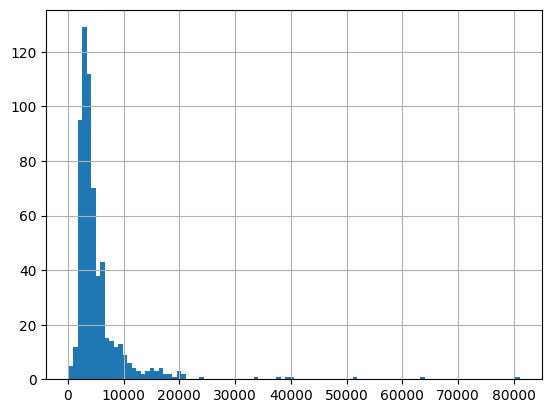

In [19]:
df["ApplicantIncome"].hist(bins=100)
plt.show()

Aquí observamos que hay algunos valores extremos. Esta es también la razón por la cual se requieren 50 _bins_ para representar claramente la distribución.

In [20]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


A continuación, construiremos Box Plots para comprender las distribuciones:

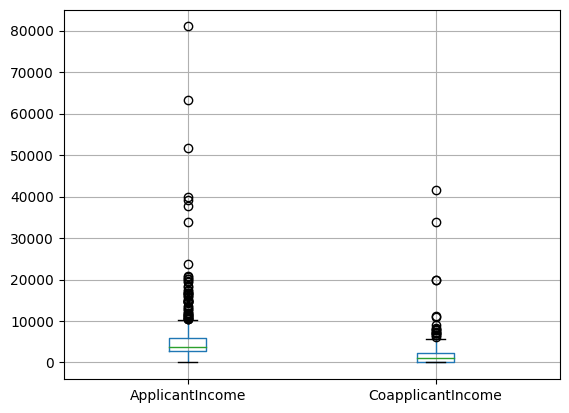

In [21]:
df.boxplot(column=["ApplicantIncome", "CoapplicantIncome"])
plt.show()

Esto gráfico indica la presencia de valores extremos de forma más clara que un histograma. La gran cantidad de valores extremos (*outliers*) se puede atribuir a la disparidad de ingresos en la población representada. Parte de esto puede ser impulsado por el hecho de que estamos viendo personas con diferentes niveles de educación, por lo que hace sentido ver los ingresos agrupados por nivel educacional:

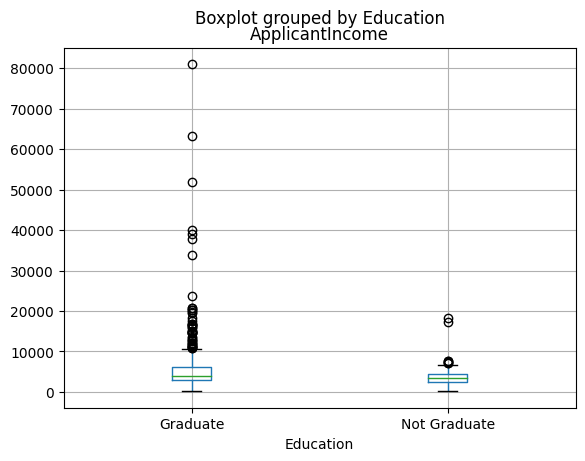

In [22]:
df.boxplot(column="ApplicantIncome", by="Education")
plt.show()

Podemos ver que no hay diferencias sustanciales entre los ingresos medios de los graduados y los no graduados. Pero hay un mayor número de graduados con ingresos muy altos, que parecen ser los valores atípicos.

Ahora, veamos el histograma y el Box Plot de `LoanAmount` (el monto del préstamo):

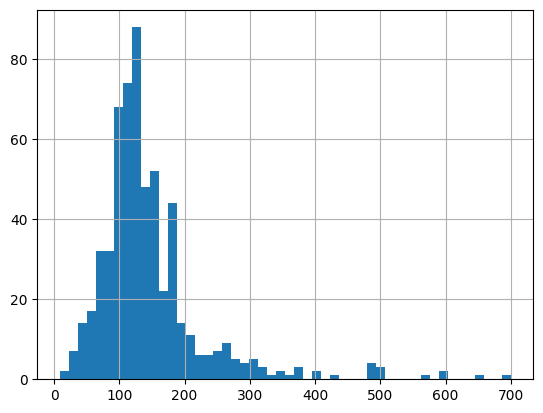

In [23]:
df["LoanAmount"].hist(bins=50)
plt.show()

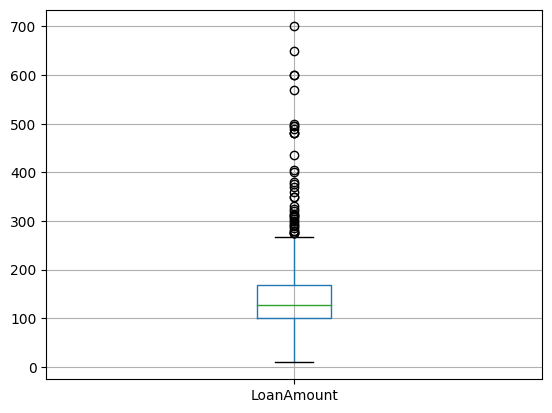

In [24]:
df.boxplot(column="LoanAmount")
plt.show()

Alternativamente, en una sola figura:

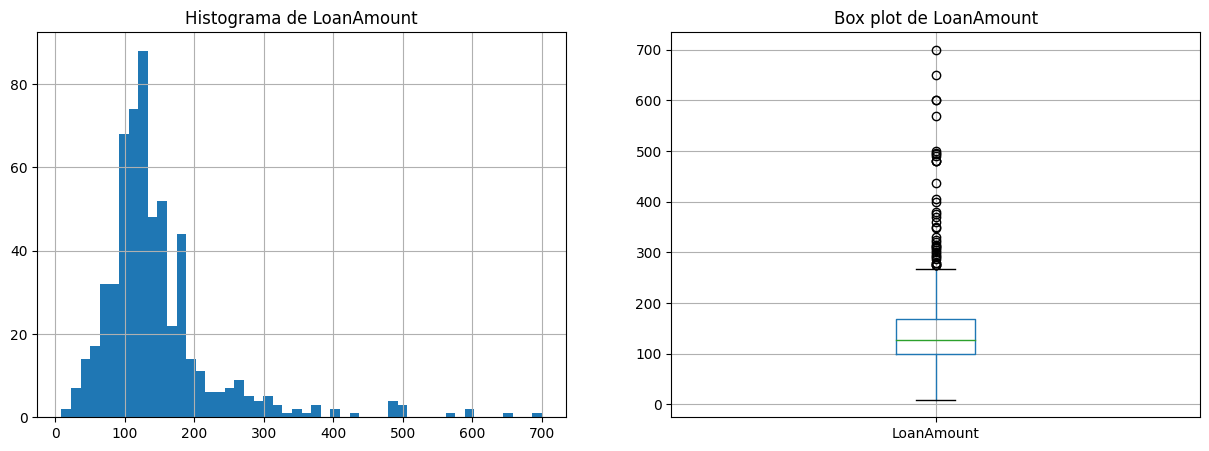

In [25]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1 = df["LoanAmount"].hist(bins=50, ax=ax1)
ax1 = ax1.set_title("Histograma de LoanAmount")
ax2 = df.boxplot(column="LoanAmount", ax=ax2)
ax2 = ax2.set_title("Box plot de LoanAmount")
plt.show()

Nuevamente hay valores extremos. Con el fin de facilitar el posterior modelamiento predictivo, tanto `ApplicantIncome` como `LoanAmount` requieren una cierta cantidad de depuración de datos (los valores extremos son difíciles de predecir). `LoanAmount` tiene además valores incompletos y también extremos, mientras que `ApplicantIncome` tiene algunos valores extremos, que exigen una comprensión más profunda. Continuaremos con el análisis de estas variables más adelante. A continuación revisaremos el análisis de variables categóricas.

## Análisis de variables categóricas

Ahora que conocemos las distribuciones para `ApplicantIncome` y `LoanIncome`, analicemos las variables categóricas en más detalle. Utilizaremos los datos como si fueran tablas dinámicas tipo Excel y con tabulación cruzada. Es importante notar que aquí el estado del préstamo ha sido codificado como 1 para sí y 0 para no. Por lo tanto, la media representa la probabilidad de obtener un préstamo.

In [26]:
temp1 = df["Credit_History"].value_counts(ascending=True)
print("Tabla de frecuencia para el historial de crédito:")
print(temp1)

Tabla de frecuencia para el historial de crédito:
Credit_History
0.0     89
1.0    475
Name: count, dtype: int64


In [27]:
temp2 = df.pivot_table(
    index="Credit_History",
    values="Loan_Status",
    aggfunc=lambda x: x.map({"Y": 1, "N": 0}).mean(),
)
print("Probabilidad de obtener un crédito, en base a la existencia de historial:")
print(temp2)

Probabilidad de obtener un crédito, en base a la existencia de historial:
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


In [28]:
# IMPORTANTE: La función map que aparece a continuación es de pandas y no de Python (ver Anexo)
temp2 = df.pivot_table(
    values="Loan_Status",
    index=["Credit_History"],
    aggfunc=lambda x: x.map({"Y": 1, "N": 0}).mean(),
)
print("Probabilidad de obtener un crédito, en base a la existencia de historial:")
print(temp2)


Probabilidad de obtener un crédito, en base a la existencia de historial:
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


Estas mismas tablas se pueden mostrar como un gráfico de barras usando la biblioteca *matplotlib* con el siguiente código:

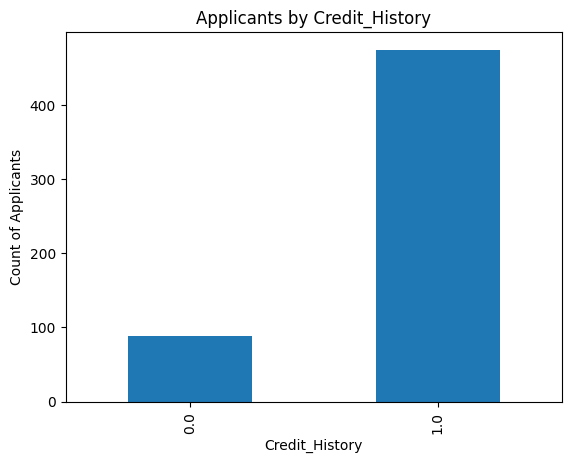

In [29]:
ax1 = temp1.plot(kind="bar")
ax1.set_xlabel("Credit_History")
ax1.set_ylabel("Count of Applicants")
ax1.set_title("Applicants by Credit_History")
plt.show()

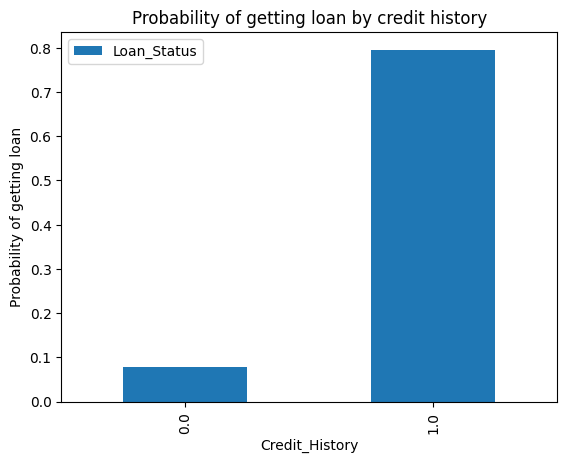

In [30]:
ax2 = temp2.plot(kind="bar")
ax2.set_xlabel("Credit_History")
ax2.set_ylabel("Probability of getting loan")
ax2.set_title("Probability of getting loan by credit history")
plt.show()

Alternativamente, en una sola figura

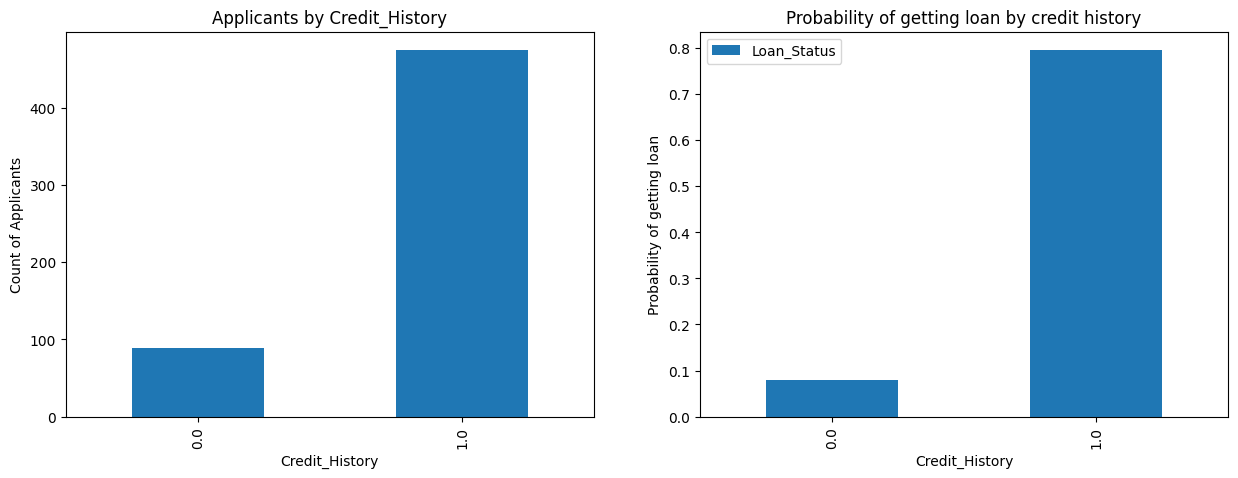

In [31]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1 = temp1.plot(kind="bar", ax=ax1)
ax1.set_xlabel("Credit_History")
ax1.set_ylabel("Count of Applicants")
ax1.set_title("Applicants by Credit_History")

ax2 = temp2.plot(kind="bar", ax=ax2)
ax2.set_xlabel("Credit_History")
ax2.set_ylabel("Probability of getting loan")
ax2.set_title("Probability of getting loan by credit history")

plt.show()

Esto muestra que las posibilidades de obtener un préstamo son ocho veces mayores si el solicitante tiene un historial crediticio válido.

Alternativamente, estos dos gráficos también se pueden visualizar combinándolos en un gráfico apilado:

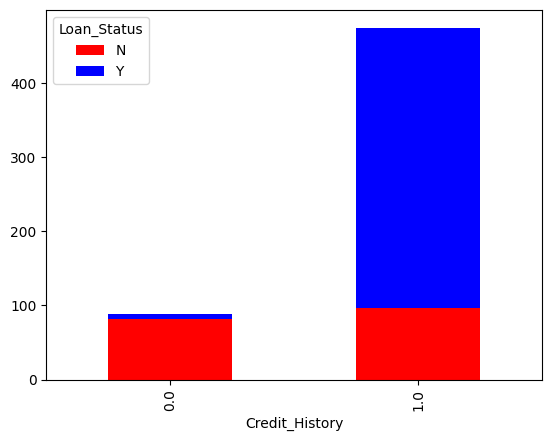

In [32]:
temp3 = pd.crosstab(df["Credit_History"], df["Loan_Status"])
temp3.plot(kind="bar", stacked=True, color=["red", "blue"], grid=False)
plt.show()

También es posible agregar la información de género:

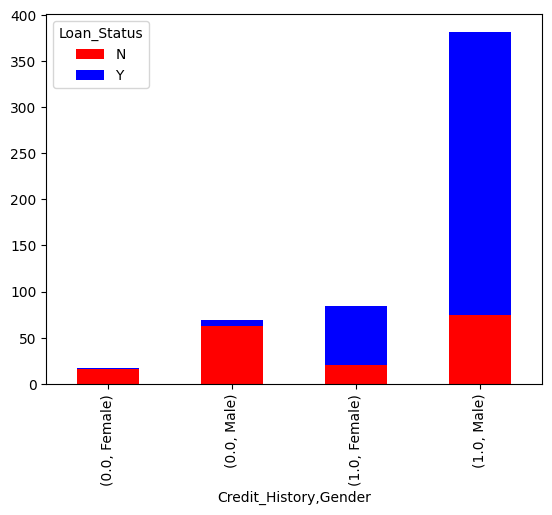

In [33]:
temp4 = pd.crosstab([df["Credit_History"], df["Gender"]], df["Loan_Status"])
temp4.plot(kind="bar", stacked=True, color=["red", "blue"], grid=False)
plt.show()

Acabamos de ver cómo podemos hacer un análisis exploratorio en Python usando Pandas, lo que nos entregó información relevante que será utilizada en la siguiente etapa.

# Limpieza y depuración de los datos

Mientras exploramos los datos, encontramos algunos problemas en estos, que deben resolverse antes de realizar análisis posteriores (por ej., a la hora de construir un modelo predictivo). Aquí algunos de los problemas de los que ya somos conscientes:

* Faltan valores en algunas variables.
* Al observar las distribuciones, vimos que `ApplicantIncome` y `LoanAmount` parecían contener valores extremos.

Además de estos problemas con los campos numéricos, también debemos ver los campos no numéricos, es decir, Género, Área de la propiedad, Casado, Educación y Dependientes para ver, si contienen información útil o incompleta.

## Verificación de los valores faltantes

Echemos un vistazo a los valores faltantes en todas las variables:

In [34]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [35]:
df.shape

(614, 13)

In [36]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Aunque los valores perdidos no son muy altos en número, muchas variables los tienen y cada uno de ellos debe estimarse y agregarse en los datos. Es importante tener en cuenta que los valores perdidos pueden no ser siempre NaN o null.

## ¿Cómo completar los valores perdidos en `LoanAmount`?

Existen numerosas formas de completar los valores faltantes del monto del préstamo, siendo el más simple el reemplazo por la media, que se puede hacer mediante el siguiente código:

In [37]:
df["LoanAmount"].isnull().sum()

22

In [38]:
df["LoanAmount"].fillna(df["LoanAmount"].mean())

0      146.412162
1      128.000000
2       66.000000
3      120.000000
4      141.000000
          ...    
609     71.000000
610     40.000000
611    253.000000
612    187.000000
613    133.000000
Name: LoanAmount, Length: 614, dtype: float64

In [39]:
df["LoanAmount"].isnull().sum()

22

Podemos tomar otro enfoque a través del siguiente proceso. Primero, veamos el Box Plot para ver si existe una tendencia:

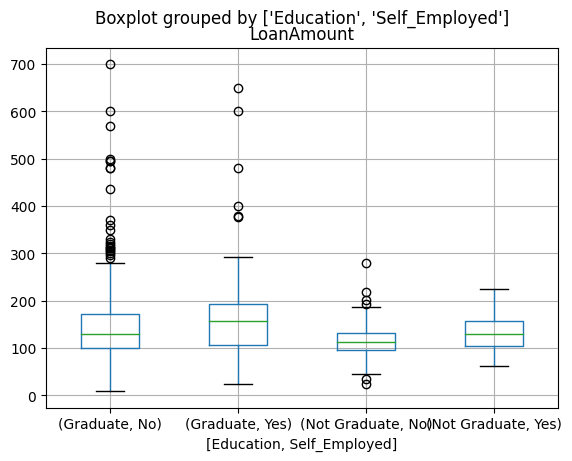

In [40]:
df = pd.read_csv("data.csv")
df.boxplot(column="LoanAmount", by=["Education", "Self_Employed"])
plt.show()

Es posible apreciar algunas variaciones en la mediana del monto del préstamo para cada grupo y esto puede usarse para llenar los valores faltantes. Pero primero, debemos asegurarnos de que cada una de las variables de `Self_Employed` y `Education` no debe tener valores perdidos. Veamos la tabla de frecuencias:

In [41]:
df["Self_Employed"].value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

Como aproximadamente 86% de los valores son "No", es seguro llenar los valores faltantes como "No", ya que hay una alta probabilidad de éxito. Esto se puede hacer usando el siguiente código:

In [42]:
df["Self_Employed"] = df["Self_Employed"].fillna("No")

Ahora, crearemos una tabla dinámica, que nos proporcionará valores medios para todos los grupos de valores únicos de las características `Self_Employed` y `Education`. Luego, definiremos una función que devolverá los valores de estas celdas y la aplicaremos sobre los datos para completar los valores que faltan del monto del préstamo:

In [65]:
table = df.pivot_table(values="LoanAmount",
                       index="Self_Employed",
                       columns="Education",
                       aggfunc=np.median)
print(table)

Education      Graduate  Not Graduate
Self_Employed                        
No                131.0         115.0
Yes               152.0         130.0


In [66]:
def fage(x):
    return table.loc[x["Self_Employed"], x["Education"]]


df[df["LoanAmount"].isnull()].apply(fage, axis=1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log


In [63]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,415.0,360.0,1.0,Urban,Y,6.028279,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515


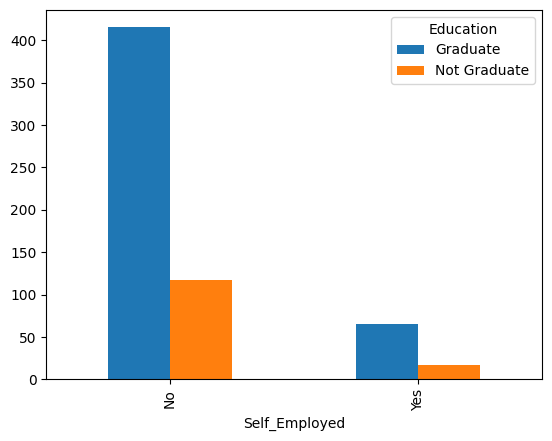

In [46]:
df["LoanAmount"] = df["LoanAmount"].fillna(df[df["LoanAmount"].isnull()].apply(fage, axis=1))
table.plot(kind="bar")
plt.show()

In [47]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,415.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [48]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## ¿Cómo tratar los valores extremos?

Analicemos `LoanAmount` primero. Es factible que algunas personas soliciten préstamos de alto valor debido a necesidades específicas, por lo que seguramente los valores extremos no se deban a un error y sean datos válidos. Entonces, en lugar de tratarlos como valores atípicos, probemos una transformación logarítmica para anular/disminuir su efecto:

<Axes: >

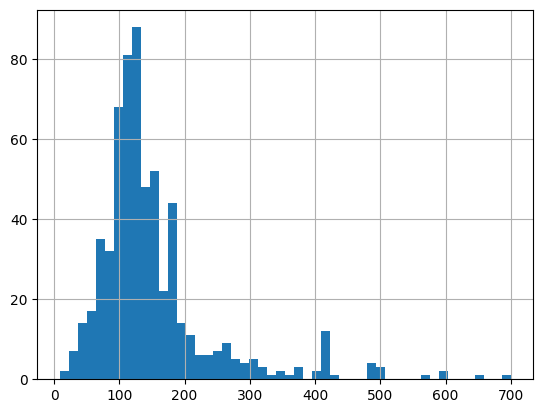

In [49]:
df["LoanAmount"].hist(bins=50)

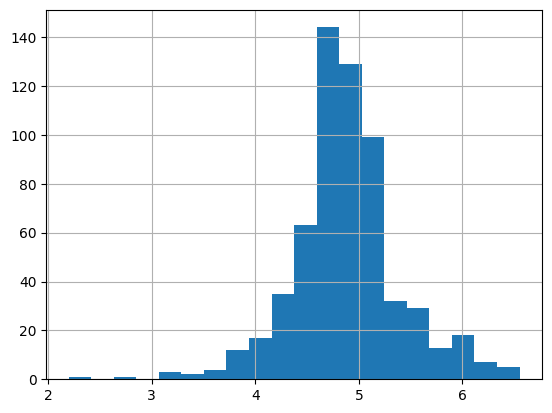

In [50]:
df["LoanAmount_log"] = np.log(df["LoanAmount"])
df["LoanAmount_log"].hist(bins=20)
plt.show()

Ahora la distribución se ve mucho más cerca de una normal (preferible para muchos modelos predictivos) y el efecto de los valores extremos ha disminuido significativamente.

Ahora, en relación a `ApplicantIncome`, una intuición puede ser que algunos solicitantes tienen un ingreso más bajo, pero tengan avales fuertes. Por lo tanto, podría ser una buena idea combinar ambos ingresos como ingreso total y tomar una transformación de este valor:

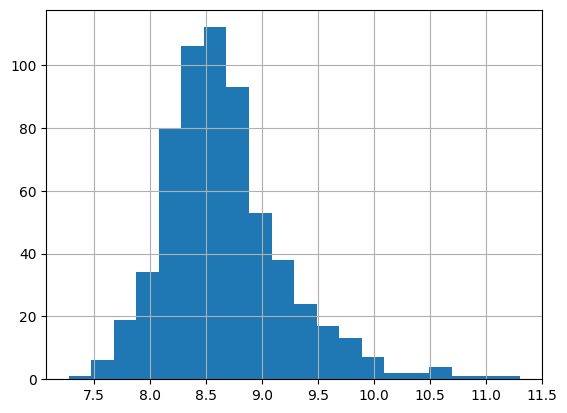

In [51]:
df["TotalIncome"] = df["ApplicantIncome"] + df["CoapplicantIncome"]
df["TotalIncome_log"] = np.log(df["TotalIncome"])
df["TotalIncome_log"].hist(bins=20)
plt.show()

Ahora vemos que la distribución es mucho más "normal" que antes.

# Anexo: funciones lambda
Las funciones `lambda` son una forma alternativa de definir funciones en Python.  Es una función pequeña y anónima. Puede tomar cualquier número de argumentos pero solo puede tener una expresión. Veamos un ejemplo:

In [52]:
sumar_uno = lambda x: x + 1

La función lambda `sumar_uno` es (casi) equivalente a:

In [53]:
def sumar_uno(x):
    return x + 1

Ocupemos una lambda para definir una función matemática y generar valores, luego ocupemos la función para graficar:

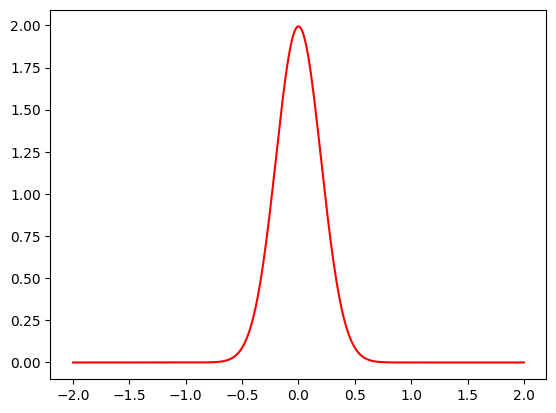

In [54]:
# La función que graficaremos es una distribución gaussiana
gauss = lambda x, mu, sigma: (1.0 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(
    -0.5 * ((x - mu) / sigma) ** 2
)

mu = 0.0
sigma = 0.2
x = np.linspace(-2, 2, 300)
plt.plot(x, gauss(x, mu, sigma), "-r")  # Aquí el f(x) es la lambda
plt.show()


Además de lo anterior, las funciones `lambda` pueden ser definidas de forma anónima; es decir, funciones que no tienen nombre. Estas funciones pueden ser vistas como _fugaces_ y son utilizadas únicamente donde fueron creadas. Esta anonimidad se combina bien con las funciones que veremos a continuación: `map`, `filter`, `reduce`.

### `map`

La función `map` aplica, en esencia, una misma función a todos los elementos de un objeto iterable (lista, diccionario, set, etc.). Recibe como parámetros una función y al menos un objeto iterable. Retorna un generador que resulta de aplicar la función sobre el iterable. `map(f, iterable)` es equivalente a `(f(x) for x in iterable)`

La cantidad de iterables entregada a `map` debe corresponder con la cantidad de parámetros que recible la función `f`.

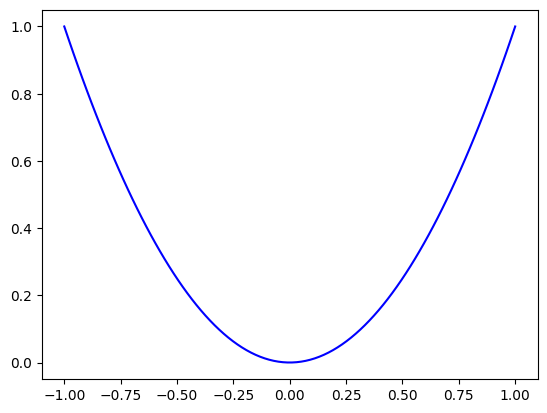

In [55]:
pow2 = lambda x: x**2
# Crea un arreglo numpy de 100 elementos, partiendo desde -1 y llegando a 1
t = np.linspace(
    -1.0, 1.0, 100
)
plt.plot(t, list(map(pow2, t)), "-b")
plt.show()


Map puede ser aplicado también en más de una lista:

In [56]:
a = [1, 2, 3, 4]
b = [17, 12, 11, 10]
c = [-1, -4, 5, 9]

c1 = list(map(lambda x, y: x + y, a, b))

c2 = list(map(lambda x, y, z: x + y + z, a, b, c))

c3 = list(map(lambda x, y, z: 2.5 * x + 2 * y - z, a, b, c))

print(c1)
print(c2)
print(c3)

[18, 14, 14, 14]
[17, 10, 19, 23]
[37.5, 33.0, 24.5, 21.0]


### `filter`

`filter(f, secuencia)` retorna el resultado de aplicar la función `f` a `secuencia`, dejando fuera los datos en que el resultado de aplicar `f` al elemento fue `False`. La función `f` **debe** retornar un valor de tipo booleano.

In [57]:
def fibonacci(n):
    a, b = 0, 1
    values = []
    for i in range(1, n):
        values.append(b)
        a, b = b, a + b
    return values


fib = fibonacci(11)
impares = list(filter(lambda x: x % 2 != 0, fib))
print(impares)

pares = list(filter(lambda x: x % 2 == 0, fib))
print(pares)

[1, 1, 3, 5, 13, 21, 55]
[2, 8, 34]


### `reduce`

`reduce(f, [s1,s2,s3,...,sn])` retorna lo que resulta de aplicar la función `f` a la secuencia `[s1, s2, s3, ..., sn]` de la siguiente forma: `f(f(f(f(s1,s2),s3),s4),s5),...`  ![](figs/reduce.png)

In [58]:
from functools import reduce

reduce(lambda x, y: x + y, range(1, 10))


45